Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 43ms/step - accuracy: 0.3577 - loss: 1.7279 - val_accuracy: 0.5574 - val_loss: 1.2238
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 45ms/step - accuracy: 0.5864 - loss: 1.1565 - val_accuracy: 0.6287 - val_loss: 1.0521
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.6549 - loss: 0.9745 - val_accuracy: 0.6629 - val_loss: 0.9722
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.6951 - loss: 0.8658 - val_accuracy: 0.6879 - val_loss: 0.9033
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.7232 - loss: 0.7939 - val_accuracy: 0.6955 - val_loss: 0.8830
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6988 - loss: 0.8718
Test accuracy: 0.6955000162124634


Saving cat.jpeg to cat (1).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Predicted class for the uploaded image: cat


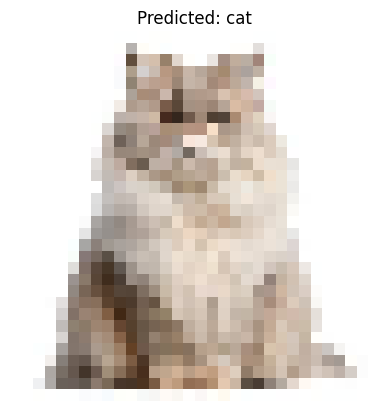

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing import image  # Import for image processing
from google.colab import files
import tensorflow as tf

# 1. Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# 2. Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# 3. Compile the model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# 4. Train the model
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# 5. Evaluate on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# 6. Upload an image from your local machine
uploaded = files.upload()

# 7. Load and preprocess the uploaded image for prediction
img_path = next(iter(uploaded))  # Get the first uploaded file name
img = image.load_img(img_path, target_size=(32, 32))  # Load the image and resize
img_array = image.img_to_array(img) / 255.0  # Convert to array and normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# 8. Make predictions on the uploaded image
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# 9. Map the predicted class index to the actual label (CIFAR-10 class names)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(f'Predicted class for the uploaded image: {class_names[predicted_class[0]]}')

# Optional: Visualize the uploaded image and its prediction
plt.imshow(img_array[0])  # Show the image
plt.title(f'Predicted: {class_names[predicted_class[0]]}')
plt.axis('off')  # Turn off axis labels
plt.show()
